# ART Boundary Attack

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import sys
!{sys.executable} -m pip install git+https://github.com/nottombrown/imagenet_stubs
sys.path.append("..")

%matplotlib inline

import imagenet_stubs
import numpy as np
import keras
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import Dense, Flatten
from keras.models import Model
import keras.backend as k
from matplotlib import pyplot as plt
from IPython.display import clear_output

from art.estimators.classification import KerasClassifier
from art.attacks import BoundaryAttack
from art.utils import to_categorical

Using TensorFlow backend.


# Model Definition

In [2]:
mean_imagenet = np.zeros([224, 224, 3])
mean_imagenet[...,0].fill(103.939)
mean_imagenet[...,1].fill(116.779)
mean_imagenet[...,2].fill(123.68)
model = ResNet50(weights='imagenet')
classifier = KerasClassifier(clip_values=(0, 255), model=model, preprocessing=(mean_imagenet, 1))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Get Target and Init Images

Target image is:  105


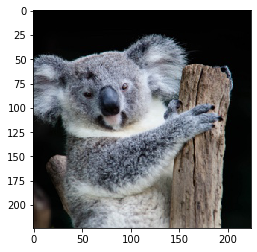

Init image is:  866


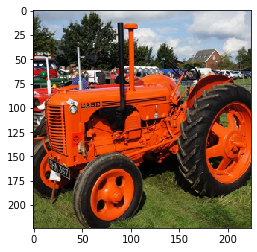

In [3]:
target_image_name = 'koala.jpg'
init_image_name = 'tractor.jpg'
for image_path in imagenet_stubs.get_image_paths():
    if image_path.endswith(target_image_name):
        target_image = image.load_img(image_path, target_size=(224, 224))
        target_image = image.img_to_array(target_image)
    if image_path.endswith(init_image_name):
        init_image = image.load_img(image_path, target_size=(224, 224))
        init_image = image.img_to_array(init_image)

print("Target image is: ", np.argmax(classifier.predict(np.array([target_image]))[0]))
plt.imshow(target_image.astype(np.uint))
plt.show()
print("Init image is: ", np.argmax(classifier.predict(np.array([init_image]))[0]))
plt.imshow(init_image.astype(np.uint))
plt.show()

# Boundary Untargeted Attack

Adversarial image at step 0. L2 error 42791.465 and class label 852.


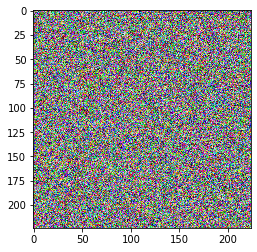

Adversarial image at step 200. L2 error 21332.465 and class label 852.


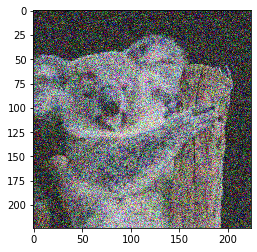

Adversarial image at step 400. L2 error 16965.281 and class label 852.


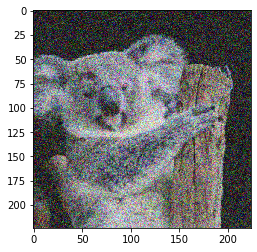

Adversarial image at step 600. L2 error 14433.81 and class label 852.


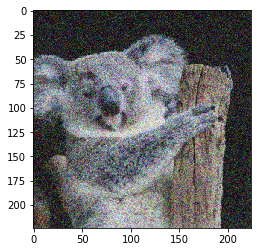

Adversarial image at step 800. L2 error 12657.082 and class label 852.


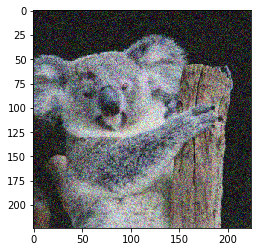

Adversarial image at step 1000. L2 error 10986.904 and class label 852.


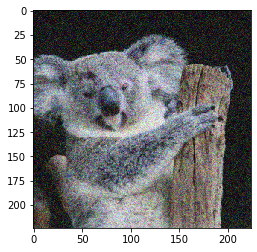

Adversarial image at step 1200. L2 error 9077.538 and class label 852.


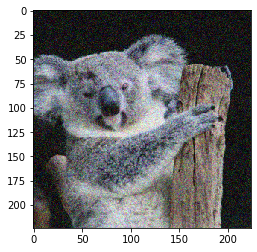

Adversarial image at step 1400. L2 error 7743.4478 and class label 852.


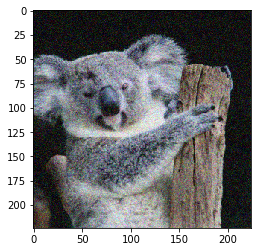

Adversarial image at step 1600. L2 error 6471.8706 and class label 852.


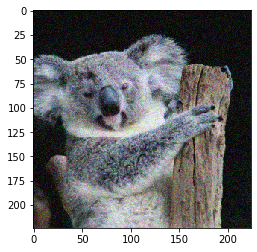

Adversarial image at step 1800. L2 error 5365.558 and class label 852.


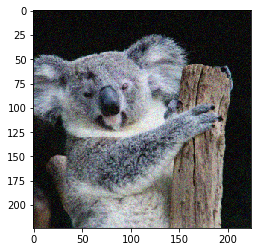

Adversarial image at step 2000. L2 error 4792.5684 and class label 852.


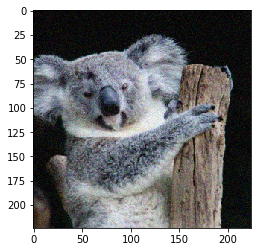

Adversarial image at step 2200. L2 error 3971.1934 and class label 852.


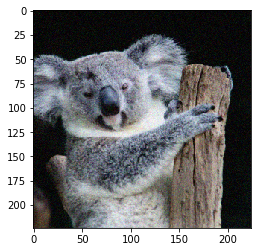

Adversarial image at step 2400. L2 error 3548.7874 and class label 852.


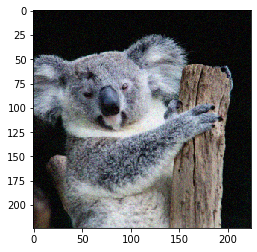

Adversarial image at step 2600. L2 error 3208.9004 and class label 852.


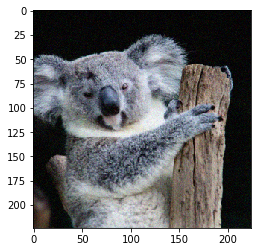

Adversarial image at step 2800. L2 error 3047.5186 and class label 852.


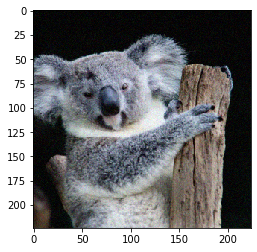

Adversarial image at step 3000. L2 error 2853.06 and class label 852.


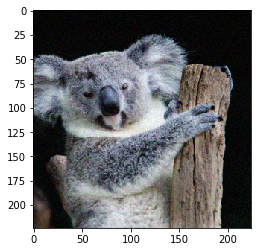

Adversarial image at step 3200. L2 error 2705.674 and class label 852.


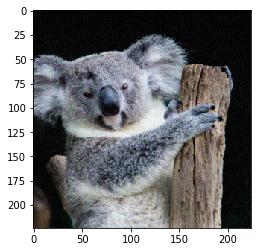

Adversarial image at step 3400. L2 error 2581.227 and class label 852.


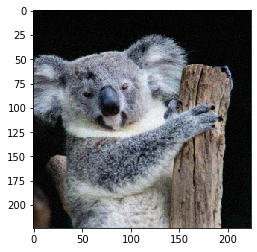

Adversarial image at step 3600. L2 error 2719.8616 and class label 852.


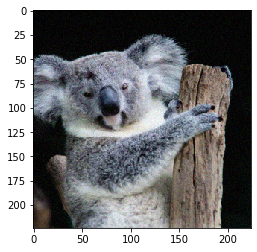

Adversarial image at step 3800. L2 error 2688.7324 and class label 852.


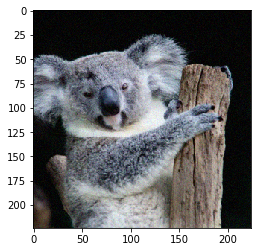

In [4]:
attack = BoundaryAttack(classifier=classifier, targeted=False, max_iter=0, delta=0.001, epsilon=0.001)
iter_step = 200
x_adv = None
for i in range(20):
    x_adv = attack.generate(x=np.array([target_image]), x_adv_init=x_adv)

    #clear_output()
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
    plt.imshow(x_adv[0].astype(np.uint))
    plt.show(block=False)
    
    if hasattr(attack, 'curr_delta') and hasattr(attack, 'curr_epsilon'):
        attack.max_iter = iter_step 
        attack.delta = attack.curr_delta
        attack.epsilon = attack.curr_epsilon
    else:
        break

# Boundary Targeted Attack

Adversarial image at step 0. L2 error 44399.297 and class label 866.


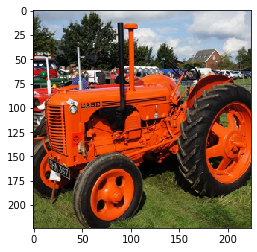

Adversarial image at step 200. L2 error 13773.696 and class label 866.


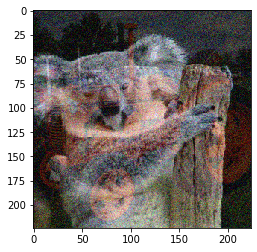

Adversarial image at step 400. L2 error 10546.029 and class label 866.


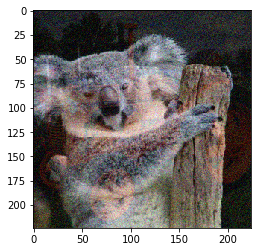

Adversarial image at step 600. L2 error 8661.262 and class label 866.


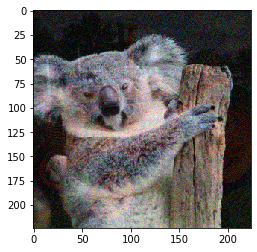

Adversarial image at step 800. L2 error 7135.7017 and class label 866.


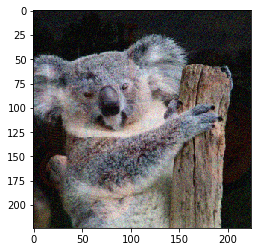

Adversarial image at step 1000. L2 error 5917.1553 and class label 866.


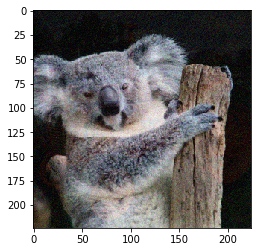

Adversarial image at step 1200. L2 error 5053.295 and class label 866.


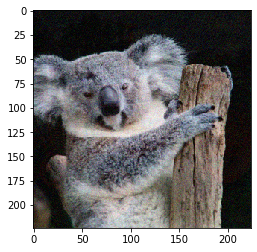

Adversarial image at step 1400. L2 error 4405.053 and class label 866.


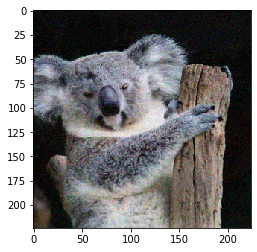

Adversarial image at step 1600. L2 error 3904.0815 and class label 866.


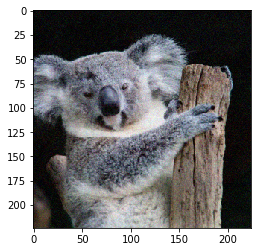

Adversarial image at step 1800. L2 error 3455.7898 and class label 866.


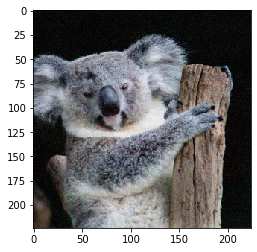

Adversarial image at step 2000. L2 error 3124.3767 and class label 866.


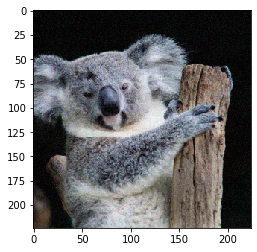

Adversarial image at step 2200. L2 error 2931.9749 and class label 866.


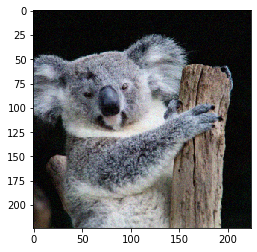

Adversarial image at step 2400. L2 error 2836.9731 and class label 866.


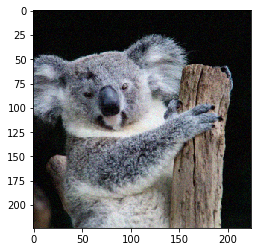

Adversarial image at step 2600. L2 error 2699.8835 and class label 866.


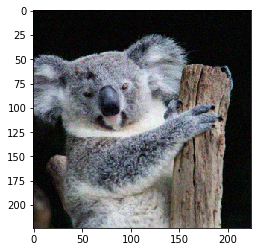

Adversarial image at step 2800. L2 error 2635.318 and class label 866.


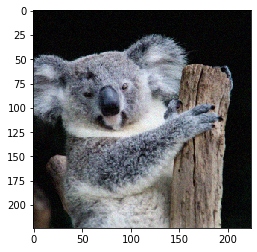

Adversarial image at step 3000. L2 error 2529.8218 and class label 866.


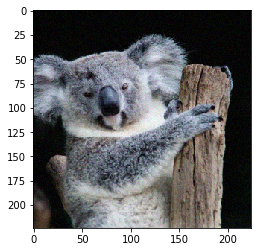

Adversarial image at step 3200. L2 error 2463.726 and class label 866.


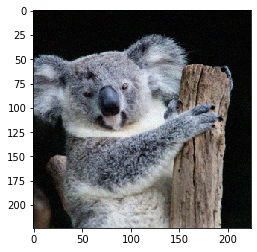

Adversarial image at step 3400. L2 error 2356.3696 and class label 866.


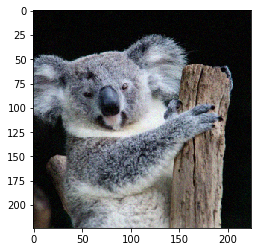

Adversarial image at step 3600. L2 error 2311.3086 and class label 866.


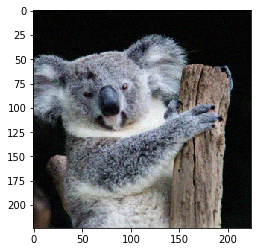

Adversarial image at step 3800. L2 error 2223.0757 and class label 866.


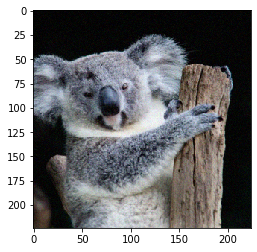

In [5]:
attack = BoundaryAttack(classifier=classifier, targeted=True, max_iter=0, delta=0.001, epsilon=0.001)
iter_step = 200
x_adv = np.array([init_image])
for i in range(20):
    x_adv = attack.generate(x=np.array([target_image]), y=to_categorical([866], 1000), x_adv_init=x_adv)

    #clear_output()    
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
    plt.imshow(x_adv[0].astype(np.uint))
    plt.show(block=False)
    
    if hasattr(attack, 'curr_delta') and hasattr(attack, 'curr_epsilon'):
        attack.max_iter = iter_step 
        attack.delta = attack.curr_delta
        attack.epsilon = attack.curr_epsilon
    else:
        break

# Unsquared Images

Boundary attack supports inputs of unsquared images. The code in the following cell describes an example of creating a Resnet50-based classifier to attack unsquared images.

In [6]:
# Adjust image shape here
image_shape = (224, 150)

mean_imagenet = np.zeros(tuple(list(image_shape) + [3]))
mean_imagenet[...,0].fill(103.939)
mean_imagenet[...,1].fill(116.779)
mean_imagenet[...,2].fill(123.68)

model = ResNet50(weights='imagenet', input_shape=tuple(list(image_shape) + [3]), include_top=False)

def _kr_initialize(_, dtype=None):
    return k.variable(value=np.random.randn(np.prod(list(model.output.shape)[1:]).value, 1000))

head = model.output
head = Flatten()(head)
head = Dense(1000, kernel_initializer=_kr_initialize, bias_initializer=keras.initializers.Zeros())(head)
new_model = Model(inputs=model.input, outputs=head)

classifier = KerasClassifier(clip_values=(0, 255), model=new_model, preprocessing=(mean_imagenet, 1))
# Then call classifier.fit() to train the new weights

/Users/minhtn/ibm/installation/miniconda3/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
